# 11 Pontos de Precisão e Recall

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
result = pd.read_csv('../resultados_sem_stemmer/RESULTADOS-NOSTEMMER.csv', sep=';')
result['Position'] = result['Results'].str.split(', ', expand=True)[0].str[1:]
result['DocNumber'] = result['Results'].str.split(', ', expand=True)[1]
result['Relevance'] = result['Results'].str.split(', ', expand=True)[2].str[:-1]
result.drop(columns=['Results'], inplace=True)
result

,QueryNumber,Position,DocNumber,Relevance
0,1,1.0,40,0.07736125211124294
1,1,2.0,971,0.050234117172333045
2,1,3.0,302,0.047962021158067886
3,1,4.0,1188,0.046768682198753596
4,1,5.0,392,0.046238516757099904
...,...,...,...,...
120280,100,1211.0,1230,0.0008328031501789552
120281,100,1212.0,974,0.0005873420398677124
120282,100,1213.0,948,0.0005235496427597196
120283,100,1214.0,940,0.0004357997398344579


In [99]:
result_stemmer = pd.read_csv('../resultados_com_stemmer/RESULTADOS-STEMMER.csv', sep=';')
result_stemmer['Position'] = result_stemmer['Results'].str.split(', ', expand=True)[0].str[1:]
result_stemmer['DocNumber'] = result_stemmer['Results'].str.split(', ', expand=True)[1]
result_stemmer['Relevance'] = result_stemmer['Results'].str.split(', ', expand=True)[2].str[:-1]
result_stemmer.drop(columns=['Results'], inplace=True)
result_stemmer

,QueryNumber,Position,DocNumber,Relevance
0,1,1.0,40,0.07565648960798238
1,1,2.0,971,0.048856105525199256
2,1,3.0,392,0.04711830903336669
3,1,4.0,1026,0.04371218236054627
4,1,5.0,302,0.043700336931355756
...,...,...,...,...
120280,100,1211.0,547,0.0008780403865268196
120281,100,1212.0,1230,0.0008363791324622214
120282,100,1213.0,974,0.0005898640340848728
120283,100,1214.0,948,0.0005257977181260492


In [34]:
esperados = pd.read_csv('../resultados_sem_stemmer/esperados.csv', sep=';')
esperados

,QueryNumber,DocNumber,DocVotes
0,1,139,7
1,1,151,6
2,1,166,1
3,1,311,1
4,1,370,2
...,...,...,...
4815,100,1000,6
4816,100,1017,7
4817,100,1033,1
4818,100,1097,2


## No Stemmer

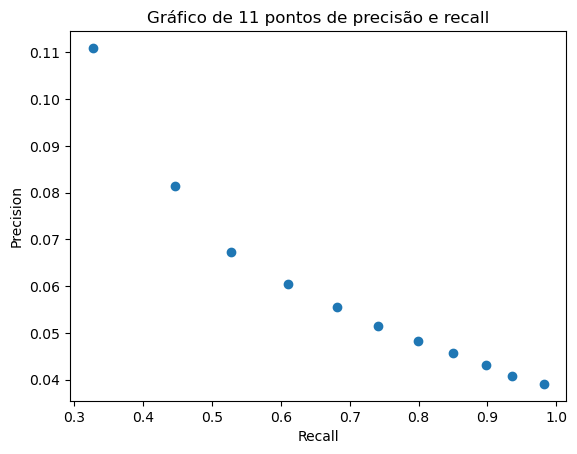

In [119]:
queries = esperados['QueryNumber'].unique()
precision = {}
recall = {}

for i in range(11):
    precision[i] = []
    recall[i] = []

for query in queries:
    relevant_documents = esperados[esperados['QueryNumber'] == query]['DocNumber']
    results = result[result['QueryNumber'] == query]['DocNumber']
    for i in range(11):
        results_until_i = results[:(i+1)*len(results)//11].astype(int)
        same_elements = np.intersect1d(relevant_documents, results_until_i)
    
        precision[i].append(len(same_elements)/len(results_until_i))
        recall[i].append(len(same_elements)/len(relevant_documents))
    
# Calculate mean precision and recall
mean_precision = {}
mean_recall = {}

for i in range(11):
    mean_precision[i] = np.mean(precision[i])
    mean_recall[i] = np.mean(recall[i])


# Plot precision x recall
plt.scatter(mean_recall.values(), mean_precision.values())
plt.title('Gráfico de 11 pontos de precisão e recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

## Stemmer

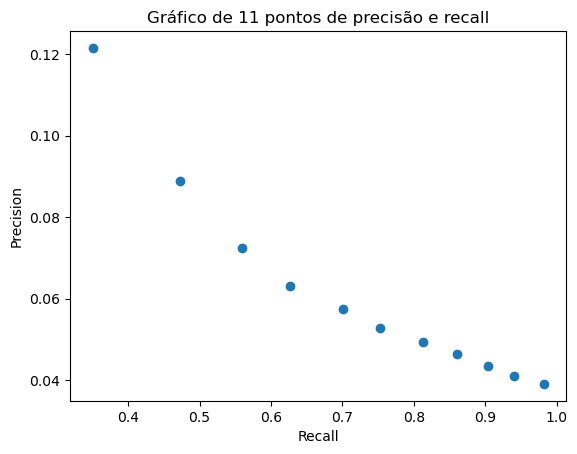

In [120]:
queries = esperados['QueryNumber'].unique()
precision = {}
recall = {}

for i in range(11):
    precision[i] = []
    recall[i] = []

for query in queries:
    relevant_documents = esperados[esperados['QueryNumber'] == query]['DocNumber']
    results = result_stemmer[result_stemmer['QueryNumber'] == query]['DocNumber']
    for i in range(11):
        results_until_i = results[:(i+1)*len(results)//11].astype(int)
        same_elements = np.intersect1d(relevant_documents, results_until_i)
    
        precision[i].append(len(same_elements)/len(results_until_i))
        recall[i].append(len(same_elements)/len(relevant_documents))
    
# Calculate mean precision and recall
mean_precision = {}
mean_recall = {}

for i in range(11):
    mean_precision[i] = np.mean(precision[i])
    mean_recall[i] = np.mean(recall[i])


# Plot precision x recall
plt.scatter(mean_recall.values(), mean_precision.values())
plt.title('Gráfico de 11 pontos de precisão e recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()